In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [83]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/SBIN.csv")

In [84]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,SBIN,EQ,225.60,236.00,243.65,234.25,243.65,243.65,240.83,2373228,5.715338e+13,NaN,NaN,NaN
1,2000-01-04,SBIN,EQ,243.65,243.65,262.00,238.85,258.00,259.10,251.46,4495741,1.130506e+14,NaN,NaN,NaN
2,2000-01-05,SBIN,EQ,259.10,249.00,264.70,245.00,249.05,248.45,252.35,3434058,8.666008e+13,NaN,NaN,NaN
3,2000-01-06,SBIN,EQ,248.45,252.00,268.00,252.00,260.50,261.00,262.18,6658801,1.745817e+14,NaN,NaN,NaN
4,2000-01-07,SBIN,EQ,261.00,261.50,279.90,255.00,279.00,273.30,269.02,7873985,2.118287e+14,NaN,NaN,NaN


In [85]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4792 non-null   float64
 14  %Deliverble         4792 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [86]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.00000,5.306000e+03,5.306000e+03,2.456000e+03,4.792000e+03,4792.000000
mean,965.871438,967.182115,982.101583,950.898587,965.727026,965.895543,966.77033,1.003930e+07,4.136854e+14,1.507028e+05,3.012573e+06,0.280363
std,857.785547,858.925475,870.739801,845.761231,857.510230,857.766537,858.38307,1.783189e+07,4.578376e+14,1.082755e+05,5.073956e+06,0.120499
min,141.450000,142.850000,147.950000,140.050000,140.550000,141.450000,145.90000,3.633000e+03,7.680600e+10,4.016000e+03,1.548000e+04,0.029400
25%,258.662500,259.262500,262.662500,255.000000,258.500000,258.712500,258.58750,1.451959e+06,1.447402e+14,8.465700e+04,3.537600e+05,0.190900
50%,475.275000,475.050000,482.625000,466.400000,475.000000,475.275000,476.19000,2.580254e+06,3.116596e+14,1.168515e+05,6.799895e+05,0.273800
75%,1722.025000,1725.000000,1755.000000,1695.000000,1718.737500,1722.025000,1725.38750,1.193361e+07,5.085768e+14,1.750568e+05,4.349524e+06,0.362075
max,3489.950000,3505.000000,3515.000000,3451.350000,3499.000000,3489.950000,3485.25000,2.626771e+08,8.549083e+15,1.155236e+06,1.333311e+08,0.948200


In [87]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [88]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [89]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [90]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [91]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [92]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [93]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
5301,2.417097,1.488578,344.30,49234985,NaN
5302,3.665304,2.630814,353.05,46003023,NaN
5303,2.317090,1.792717,363.40,56696255,NaN
5304,4.064698,-1.534247,359.40,63692926,NaN
5305,3.438436,0.014146,353.50,53832840,NaN


In [94]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_9868\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [95]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [96]:
#Define the prediction model
model = RandomForestRegressor()

In [97]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [98]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9411425043298026


In [99]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [100]:
predictions = model.predict(X_Check)

In [101]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

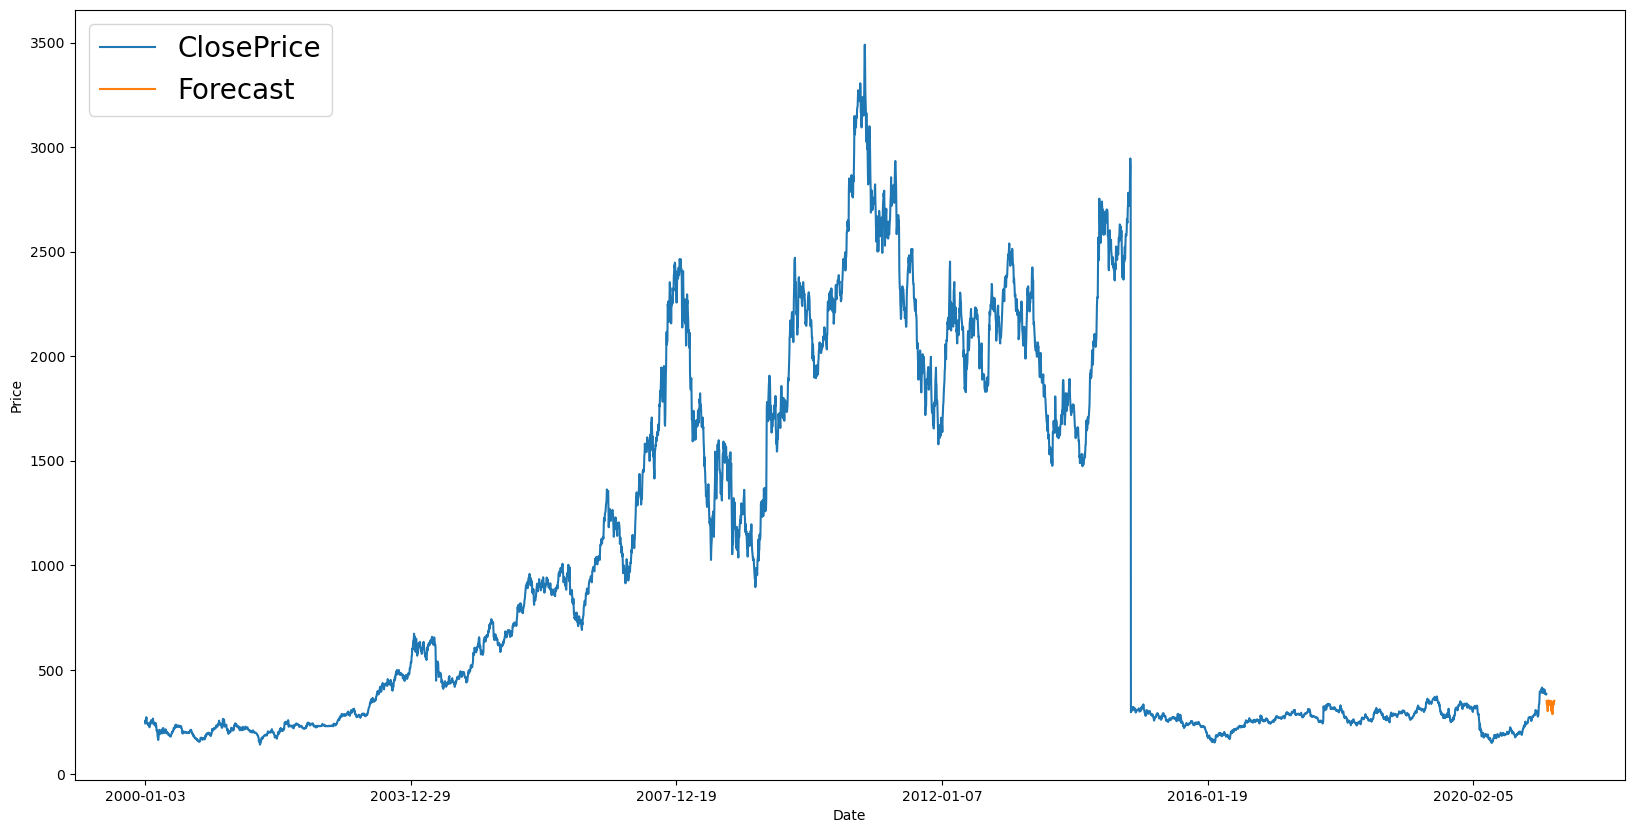

In [102]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')